In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suryadeepak9444","key":"51df0b2d47c5a4b3c2eb32017964e6ef"}'}

# New Section

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d medharawat/google-stock-price

  0% 0.00/23.4k [00:00<?, ?B/s]
100% 23.4k/23.4k [00:00<00:00, 20.5MB/s]


In [ ]:
!unzip /content/google-stock-price.zip

Archive:  /content/google-stock-price.zip
  inflating: Google_Stock_Price_Test.csv  
  inflating: Google_Stock_Price_Train.csv  


In [ ]:
dataframe = pd.read_csv("/content/Google_Stock_Price_Train.csv")

In [ ]:
dataframe.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
dataframe.isna().value_counts()

Date   Open   High   Low    Close  Volume
False  False  False  False  False  False     1258
dtype: int64

In [ ]:
dataframe['Close']

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: object

In [ ]:
open_list = dataframe.iloc[:, 1].values
open_list = np.reshape(open_list, (open_list.shape[0], 1))

In [ ]:
closed_list = dataframe.iloc[:, 4].values
closed_list = np.array([float(i.replace(",","")) for i in closed_list])
closed_list = np.reshape(closed_list, (closed_list.shape[0], 1))

In [ ]:
print(open_list.shape, closed_list.shape)

(1258, 1) (1258, 1)


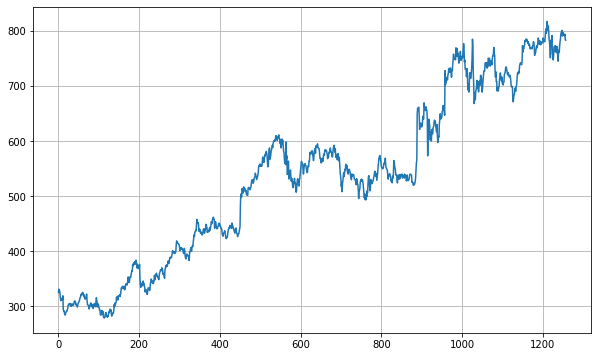

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(open_list)
plt.grid()
plt.show()

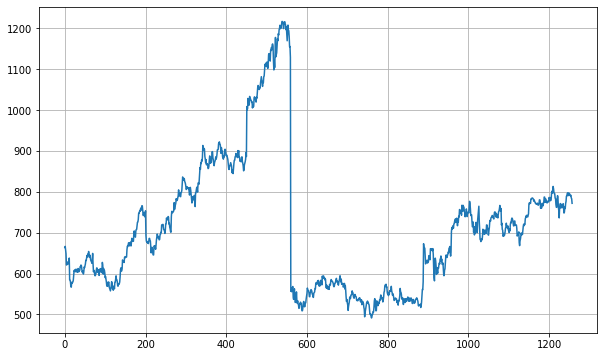

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(closed_list)
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
open_scaled = sc.fit_transform(open_list)

In [ ]:
X_train = []
y_train = []
for i in range(60, len(open_scaled)):
  X_train.append(open_scaled[i-60:i, 0])
  y_train.append(open_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train[0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

In [ ]:
y_train[0]

0.08627874097775134

In [ ]:
X_train[1]

array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
       0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
       0.07474514, 0.02797827, 0.02379269, 0.02409033, 0.0159238 ,
       0.01078949, 0.00967334, 0.01642607, 0.02100231, 0.02280676,
       0.02273235, 0.02810849, 0.03212665, 0.0433812 , 0.04475779,
       0.04790163, 0.0440695 , 0.04648783, 0.04745517, 0.04873875,
       0.03936305, 0.04137213, 0.04034898, 0.04784582, 0.04325099,
       0.04356723, 0.04286033, 0.04602277, 0.05398467, 0.05738894,
       0.05714711, 0.05569611, 0.04421832, 0.04514845, 0.04605997,
       0.04412531, 0.03675869, 0.04486941, 0.05065481, 0.05214302,
       0.05612397, 0.05818885, 0.06540665, 0.06882953, 0.07243843,
       0.07993526, 0.07846566, 0.08034452, 0.08497656, 0.08627874])

In [ ]:
y_train[1]

0.08471612471166012

In [ ]:
X_train.shape

(1198, 60)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train[0]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.036

In [ ]:
X_train.shape

(1198, 60, 1)

In [ ]:
model1 = tf.keras.models.Sequential([
      tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(50, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(50, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(50),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1)
])

model1.compile(optimizer='adam', loss='mse')
history = model1.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0335
Epoch 2/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0039
Epoch 13/100


In [ ]:
print("Mean loss of LSTM", np.mean(history.history['loss']))

Mean loss of LSTM 0.0029167639941442757


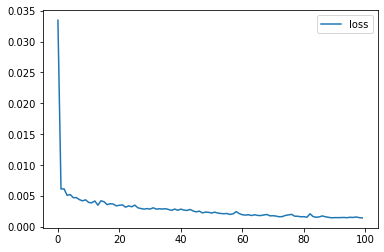

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
forecast = []
results = []
for time in range(len(open_scaled) - 60):
  forecast.append(model1.predict(open_scaled[time:time + 60][np.newaxis]))

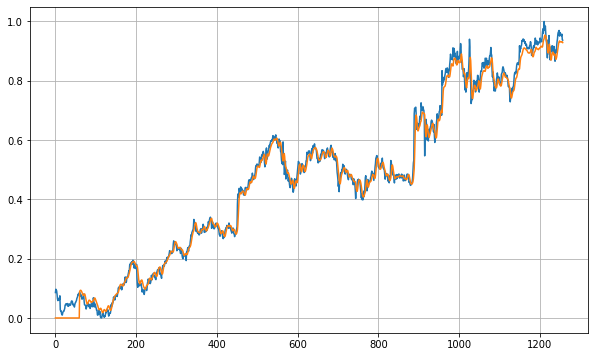

In [ ]:
res = np.zeros(len(open_scaled))
results = np.array(forecast)[:, 0, 0]
for i in range(len(res)):
  if i<60:
    pass
  elif i>=60:
    res[i] = results[i-60]
     
plt.figure(figsize=(10, 6))
plt.plot(open_scaled)
plt.plot(res)
plt.grid()

In [ ]:
model2 = tf.keras.models.Sequential([
      tf.keras.layers.GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.GRU(50, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.GRU(50, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.GRU(50),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1)
])

model2.compile(optimizer='adam', loss='mse')
history = model2.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0441
Epoch 2/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0051
Epoch 4/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0043
Epoch 5/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0042
Epoch 6/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0038
Epoch 8/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0035
Epoch 9/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0036
Epoch 10/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0033
Epoch 11/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0037
Epoch 12/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0033
Epoch 13/100


In [ ]:
print("Mean loss of GRU", np.mean(history.history['loss']))

Mean loss of GRU 0.002655531286727637


In [ ]:
forecast = []
results = []
for time in range(len(open_scaled) - 60):
  forecast.append(model2.predict(open_scaled[time:time + 60][np.newaxis]))

results = np.array(forecast)[:, 0, 0]
res = np.zeros(len(open_scaled))

for i in range(len(res)):
  if i<60:
    pass
  elif i>=60:
    res[i] = results[i-60]

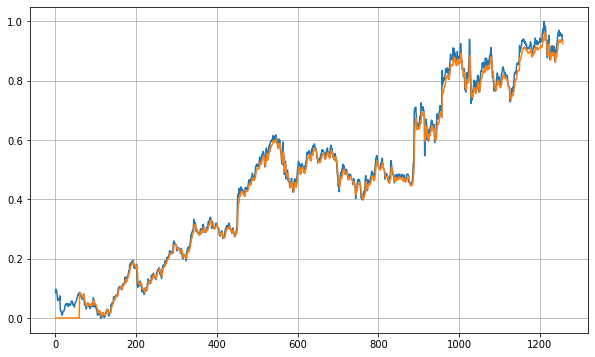

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(open_scaled)
plt.plot(res)
plt.grid()

In [ ]:
model3 = tf.keras.models.Sequential([
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1)
])

model3.compile(optimizer='adam', loss='mse')
history = model3.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0311
Epoch 2/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0049
Epoch 3/100
38/38 [==============================] - 7s 186ms/step - loss: 0.0041
Epoch 4/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0035
Epoch 6/100
38/38 [==============================] - 7s 186ms/step - loss: 0.0033
Epoch 7/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0030
Epoch 8/100
38/38 [==============================] - 7s 187ms/step - loss: 0.0034
Epoch 9/100
38/38 [==============================] - 7s 186ms/step - loss: 0.0029
Epoch 10/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0026
Epoch 11/100
38/38 [==============================] - 7s 186ms/step - loss: 0.0026
Epoch 12/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0026
Epoch 13/100


In [ ]:
forecast = []
results = []
for time in range(len(open_scaled) - 60):
  forecast.append(model3.predict(open_scaled[time:time + 60][np.newaxis]))

results = np.array(forecast)[:, 0, 0]
res = np.zeros(len(open_scaled))

for i in range(len(res)):
  if i<60:
    pass
  elif i>=60:
    res[i] = results[i-60]

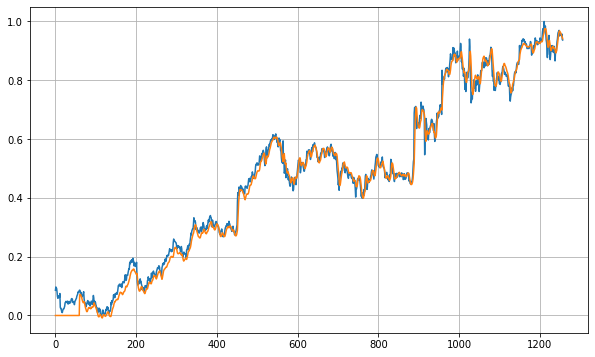

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(open_scaled)
plt.plot(res)
plt.grid()

In [ ]:
print("Mean loss of LSTM with Bidirectional", np.mean(history.history['loss']))

Mean loss of LSTM with Bidirectional 0.002188499146141112


In [ ]:
dataframe_test = pd.read_csv("/content/Google_Stock_Price_Test.csv")

In [ ]:
dataframe_total = pd.concat((dataframe['Open'], dataframe_test['Open']), axis=0)

In [ ]:
inputs = dataframe_total[len(dataframe_total)-len(dataframe_test)-60:].values

In [ ]:
inputs = inputs.reshape(-1, 1)

In [ ]:
inputs = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = model3.predict(X_test)

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
real_stock_price = dataframe_test.iloc[:, 1:2].values

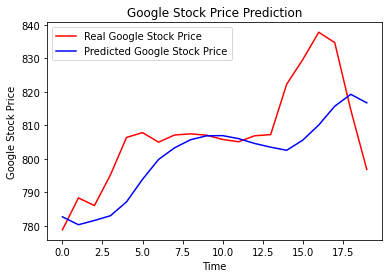

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
closed_scaled = sc.fit_transform(closed_list)


In [ ]:
X_train = []
y_train = []
for i in range(60, len(closed_scaled)):
  X_train.append(closed_scaled[i-60:i, 0])
  y_train.append(closed_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train[0]

array([0.23757287, 0.24151427, 0.22878051, 0.21641884, 0.1785483 ,
       0.17947163, 0.18335791, 0.18841558, 0.18202114, 0.18695478,
       0.19290823, 0.2020589 , 0.12842633, 0.12777862, 0.12146686,
       0.1057426 , 0.10382702, 0.12015766, 0.11701556, 0.12033681,
       0.12132905, 0.12721359, 0.14263468, 0.16016427, 0.15698083,
       0.16121164, 0.1634304 , 0.15579565, 0.16443642, 0.16108761,
       0.15531331, 0.1566363 , 0.15404545, 0.16691702, 0.15859322,
       0.15607128, 0.16128054, 0.16046746, 0.17295316, 0.17276022,
       0.17846561, 0.17688078, 0.16726155, 0.15448645, 0.15702217,
       0.15749073, 0.1480231 , 0.15474829, 0.17211251, 0.16964569,
       0.17671541, 0.18209005, 0.19436903, 0.19370754, 0.20262393,
       0.21096151, 0.20620702, 0.21546794, 0.21229828, 0.22430164])

In [ ]:
y_train[0]


0.21420007441809186

In [ ]:
X_train[1]


array([0.24151427, 0.22878051, 0.21641884, 0.1785483 , 0.17947163,
       0.18335791, 0.18841558, 0.18202114, 0.18695478, 0.19290823,
       0.2020589 , 0.12842633, 0.12777862, 0.12146686, 0.1057426 ,
       0.10382702, 0.12015766, 0.11701556, 0.12033681, 0.12132905,
       0.12721359, 0.14263468, 0.16016427, 0.15698083, 0.16121164,
       0.1634304 , 0.15579565, 0.16443642, 0.16108761, 0.15531331,
       0.1566363 , 0.15404545, 0.16691702, 0.15859322, 0.15607128,
       0.16128054, 0.16046746, 0.17295316, 0.17276022, 0.17846561,
       0.17688078, 0.16726155, 0.15448645, 0.15702217, 0.15749073,
       0.1480231 , 0.15474829, 0.17211251, 0.16964569, 0.17671541,
       0.18209005, 0.19436903, 0.19370754, 0.20262393, 0.21096151,
       0.20620702, 0.21546794, 0.21229828, 0.22430164, 0.21420007])

In [ ]:
X_train.shape

(1198, 60)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train[0]


array([[0.23757287],
       [0.24151427],
       [0.22878051],
       [0.21641884],
       [0.1785483 ],
       [0.17947163],
       [0.18335791],
       [0.18841558],
       [0.18202114],
       [0.18695478],
       [0.19290823],
       [0.2020589 ],
       [0.12842633],
       [0.12777862],
       [0.12146686],
       [0.1057426 ],
       [0.10382702],
       [0.12015766],
       [0.11701556],
       [0.12033681],
       [0.12132905],
       [0.12721359],
       [0.14263468],
       [0.16016427],
       [0.15698083],
       [0.16121164],
       [0.1634304 ],
       [0.15579565],
       [0.16443642],
       [0.16108761],
       [0.15531331],
       [0.1566363 ],
       [0.15404545],
       [0.16691702],
       [0.15859322],
       [0.15607128],
       [0.16128054],
       [0.16046746],
       [0.17295316],
       [0.17276022],
       [0.17846561],
       [0.17688078],
       [0.16726155],
       [0.15448645],
       [0.15702217],
       [0.15749073],
       [0.1480231 ],
       [0.154

In [ ]:
X_train.shape

(1198, 60, 1)

In [ ]:
model4 = tf.keras.models.Sequential([
      tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(50, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(50, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(50),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1)
])

model4.compile(optimizer='adam', loss='mse')
history = model4.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0267
Epoch 2/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0111
Epoch 3/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0084
Epoch 4/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0075
Epoch 5/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0077
Epoch 6/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0095
Epoch 7/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0056
Epoch 9/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0073
Epoch 10/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0065
Epoch 11/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0056
Epoch 12/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0056
Epoch 13/100


In [ ]:
print("Mean loss of LSTM", np.mean(history.history['loss']))

Mean loss of LSTM 0.0033314520691055806


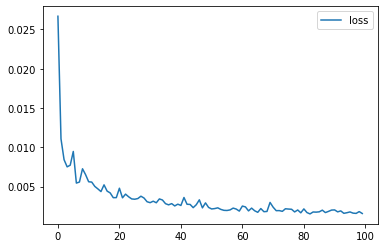

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
forecast = []
results = []
for time in range(len(closed_scaled) - 60):
  forecast.append(model4.predict(closed_scaled[time:time + 60][np.newaxis]))

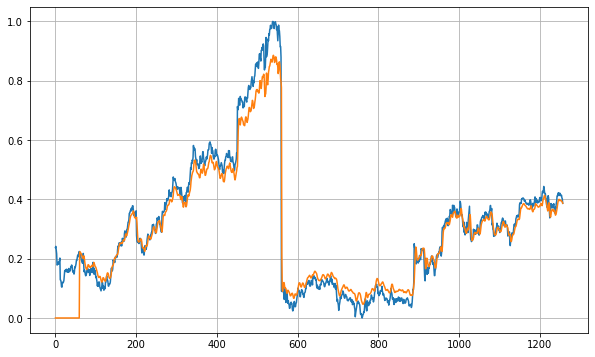

In [ ]:
res = np.zeros(len(closed_scaled))
results = np.array(forecast)[:, 0, 0]
for i in range(len(res)):
  if i<60:
    pass
  elif i>=60:
    res[i] = results[i-60]
     
plt.figure(figsize=(10, 6))
plt.plot(closed_scaled)
plt.plot(res)
plt.grid()

In [ ]:
model5 = tf.keras.models.Sequential([
      tf.keras.layers.GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.GRU(50, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.GRU(50, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.GRU(50),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1)
])

model5.compile(optimizer='adam', loss='mse')
history = model5.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0237
Epoch 2/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0052
Epoch 3/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0041
Epoch 6/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0038
Epoch 10/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0035
Epoch 11/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0035
Epoch 12/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0033
Epoch 13/100


In [ ]:
print("Mean loss of GRU", np.mean(history.history['loss']))

Mean loss of GRU 0.0024230847985018044


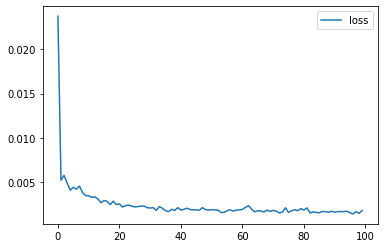

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
forecast = []
results = []
for time in range(len(closed_scaled) - 60):
  forecast.append(model5.predict(closed_scaled[time:time + 60][np.newaxis]))

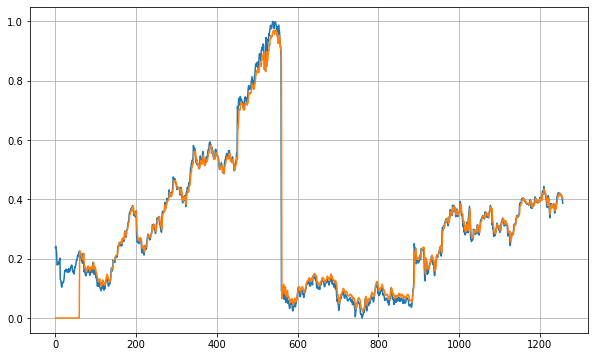

In [ ]:
res = np.zeros(len(closed_scaled))
results = np.array(forecast)[:, 0, 0]
for i in range(len(res)):
  if i<60:
    pass
  elif i>=60:
    res[i] = results[i-60]
     
plt.figure(figsize=(10, 6))
plt.plot(closed_scaled)
plt.plot(res)
plt.grid()

In [ ]:
model6 = tf.keras.models.Sequential([
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1)
])

model6.compile(optimizer='adam', loss='mse')
history = model6.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 7s 186ms/step - loss: 0.0180
Epoch 2/100
38/38 [==============================] - 7s 187ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 7s 183ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0044
Epoch 5/100
38/38 [==============================] - 7s 186ms/step - loss: 0.0038
Epoch 6/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0040
Epoch 7/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0040
Epoch 9/100
38/38 [==============================] - 7s 186ms/step - loss: 0.0031
Epoch 10/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0036
Epoch 11/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0036
Epoch 12/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0036
Epoch 13/100


In [ ]:
print("Mean loss of Bi-directional LSTM", np.mean(history.history['loss']))

Mean loss of Bi-directional LSTM 0.0023388462245929986


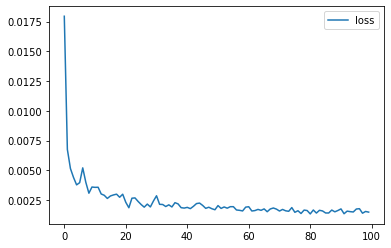

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
forecast = []
results = []
for time in range(len(closed_scaled) - 60):
  forecast.append(model.predict(closed_scaled[time:time + 60][np.newaxis]))

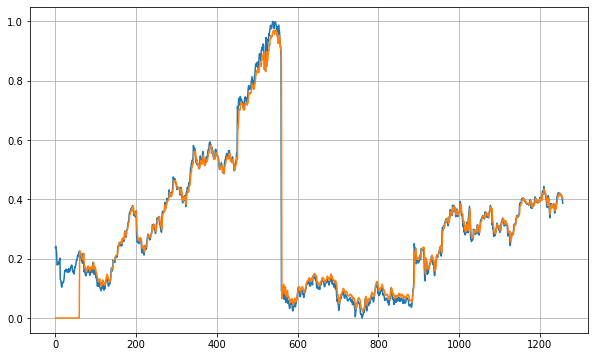

In [ ]:
res = np.zeros(len(closed_scaled))
results = np.array(forecast)[:, 0, 0]
for i in range(len(res)):
  if i<60:
    pass
  elif i>=60:
    res[i] = results[i-60]
     
plt.figure(figsize=(10, 6))
plt.plot(closed_scaled)
plt.plot(res)
plt.grid()

In [ ]:
dataframe_test = pd.read_csv("/content/Google_Stock_Price_Test.csv")

In [ ]:
dataframe_total = pd.concat((dataframe['Close'], dataframe_test['Close']), axis=0)

In [ ]:
inputs = dataframe_total[len(dataframe_total)-len(dataframe_test)-60:].values

In [ ]:
inputs = inputs.reshape(-1, 1)

In [ ]:
inputs = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = model6.predict(X_test)

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
real_stock_price = dataframe_test.iloc[:, 4:5].values

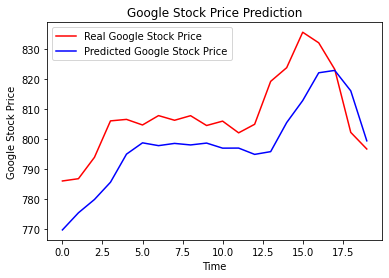

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()